<a href="https://colab.research.google.com/github/robertapassarelli/QME_projectwork/blob/master/project_qme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Group H 
# Project work - QME 

In [0]:
import pandas as pd 
import numpy as np
import io 
from collections import defaultdict
from collections import Counter
from google.colab import files # to save and read the csv file 
import matplotlib.pyplot as plt

In [3]:
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['eter_data.csv']), sep=";", header = 0, encoding='latin-1')
data.head()

Saving eter_data.csv to eter_data.csv


,ETER ID Year,ETER ID,National identifier,Institution Name,Country Code,Region of establishment (NUTS 2),Total Current expenditure (EURO),Basic government allocation (EURO),Student fees funding (EURO),Total Current revenues (EURO),Research active institution,Students enrolled at ISCED 8 - men,Students enrolled at ISCED 8 - women,Students enrolled ISCED 8 - gender unclassified,Total students enrolled at ISCED 8,Graduates at ISCED 8 - men,Graduates at ISCED 8 - women,Total graduates at ISCED 8,R&D Expenditure (EURO),PhD intensity
0,FI0001.2016,FI0001,FI0001,Helsingin yliopisto,FI,FI1B,657907048,412436889,a,673420595,1,1785,2892,0,4677,215,338,553,335715100,"0,1013006045"
1,FI0002.2016,FI0002,FI0002,Turun yliopisto,FI,FI1C,257287148,166998500,a,264748916,1,788,1185,0,1973,72,108,180,121880500,"0,054446461"
2,FI0003.2016,FI0003,FI0003,Åbo Akademi,FI,FI1C,99747199,60701853,a,103015362,1,332,391,0,723,36,38,74,41158600,"0,0631938514"
3,FI0004.2016,FI0004,FI0004,Oulun yliopisto,FI,FI1D,215921256,145611000,a,215939884,1,601,681,0,1282,96,103,199,119658200,"0,0732155997"
4,FI0005.2016,FI0005,FI0005,Tampereen yliopisto,FI,FI19,177860004,110029264,a,179016548,1,604,1047,0,1651,53,87,140,84259500,"0,0693069307"


In [4]:
uploaded = files.upload()
data_clean = pd.read_csv(io.BytesIO(uploaded['clean_data.csv']), sep=",", header = 0, encoding='latin-1')
data_clean.head()

Saving clean_data.csv to clean_data.csv


,Unnamed: 0,ETER ID Year,ETER ID,National identifier,Institution Name,Country Code,Region of establishment (NUTS 2),Total Current expenditure (EURO),Basic government allocation (EURO),Student fees funding (EURO),Total Current revenues (EURO),Research active institution,Students enrolled at ISCED 8 - men,Students enrolled at ISCED 8 - women,Students enrolled ISCED 8 - gender unclassified,Total students enrolled at ISCED 8,Graduates at ISCED 8 - men,Graduates at ISCED 8 - women,Total graduates at ISCED 8,R&D Expenditure (EURO),PhD intensity
0,0,FI0001.2016,FI0001,FI0001,Helsingin yliopisto,FI,FI1B,657907048,412436889,NaN,673420595,1,1785.0,2892.0,0.0,4677.0,215.0,338.0,553.0,335715100,"0,1013006045"
1,1,FI0002.2016,FI0002,FI0002,Turun yliopisto,FI,FI1C,257287148,166998500,NaN,264748916,1,788.0,1185.0,0.0,1973.0,72.0,108.0,180.0,121880500,"0,054446461"
2,2,FI0003.2016,FI0003,FI0003,Ã bo Akademi,FI,FI1C,99747199,60701853,NaN,103015362,1,332.0,391.0,0.0,723.0,36.0,38.0,74.0,41158600,"0,0631938514"
3,3,FI0004.2016,FI0004,FI0004,Oulun yliopisto,FI,FI1D,215921256,145611000,NaN,215939884,1,601.0,681.0,0.0,1282.0,96.0,103.0,199.0,119658200,"0,0732155997"
4,4,FI0005.2016,FI0005,FI0005,Tampereen yliopisto,FI,FI19,177860004,110029264,NaN,179016548,1,604.0,1047.0,0.0,1651.0,53.0,87.0,140.0,84259500,"0,0693069307"


In [3]:
uploaded = files.upload()
raw_data = pd.read_csv(io.BytesIO(uploaded['eter-export-selected.csv']), sep=";", header = 0, encoding='latin-1')
raw_data.head()

Saving eter-export-selected.csv to eter-export-selected.csv


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ï»¿ETER ID Year,ETER ID,National identifier,English Institution Name,Country Code,Region of establishment (NUTS 2),Geographic coordinates - latitude,Geographic coordinates - longitude,Personnel expenditure (EURO),Non-personnel expenditure (EURO),Expenditure unclassified (EURO),Total Current expenditure (EURO),Capital expenditure (EURO),Basic government allocation (EURO),Total Current revenues (EURO),Research active institution,Students enrolled at ISCED 8 - men,Students enrolled at ISCED 8 - women,Students enrolled ISCED 8 - gender unclassified,Flag Students ISCED 8 - gender,Students enrolled at ISCED 8 - national,Students enrolled at ISCED 8 - foreigner,Students enrolled ISCED 8-citizenship unclassified,Flag Students ISCED 8 - citizenship,Students enrolled at ISCED 8 - resident,Students enrolled at ISCED 8 - mobile,Students enrolled ISCED 8-mobility unclassified,Flag Students ISCED 8 - mobility,Students enrolled at ISCED 8 - Generic programmes and qualifications,Students enrolled at ISCED 8 - Education,Students enrolled at ISCED 8 - Arts and Humanities,"Students enrolled at ISCED 8 - Social sciences, journalism and information","Students enrolled at ISCED 8 - Business, administration and law","Students enrolled at ISCED 8 - Natural sciences, mathematics and statistics",Students enrolled at ISCED 8 - Information and Communication Technologies,"Students enrolled at ISCED 8 - Engineering, manufacturing and construction","Students enrolled at ISCED 8 - Agriculture, forestry, fisheries and veterinary",Students enrolled at ISCED 8 - Health and welfare,Students enrolled at ISCED 8 - Services,Students enrolled ISCED 8 - ISCED-FoE unclassified,...,Graduates at ISCED 8 - men,Graduates at ISCED 8 - women,Graduates at ISCED 8 - gender unclassified,Flag Graduates ISCED 8 - gender,Graduates at ISCED 8 - national,Graduates at ISCED 8 - foreigner,Graduates at ISCED 8 - citizenship unclassified,Flag Graduates ISCED 8 - citizenship,Graduates at ISCED 8 - resident,Graduates at ISCED 8 - mobile,Graduates at ISCED 8 - mobility unclassified,Flag Graduates ISCED 8 - mobility,Graduates at ISCED 8 - Generic programmes and qualifications,Graduates at ISCED 8 - Education,Graduates at ISCED 8 - Arts and Humanities,"Graduates at ISCED 8 - Social sciences, journalism and information","Graduates at ISCED 8 - Business, administration and law","Graduates at ISCED 8 - Natural sciences, mathematics and statistics",Graduates at ISCED 8 - Information and Communication Technologies,"Graduates at ISCED 8 - Engineering, manufacturing and construction","Graduates at ISCED 8 - Agriculture, forestry, fisheries and veterinary",Graduates at ISCED 8 - Health and welfare,Graduates at ISCED 8 - Services,Graduates at ISCED 8 - ISCED-FoE unclassified,Flag Graduates ISCED 8 - ISCED-FoE,Total graduates at ISCED 8,Flag Total graduates ISCED 8,Notes on graduates at ISCED 8,Included in official R&D statistics,R&D Expenditure (EURO),Flag R&D Expenditure,EU-FP Researchers mobility,EU-FP Staff mobility,EU-FP Research training cooperation,Flag Researchers mobility,Notes on research activities,PhD intensity,Flag PhD intensity,Erasmus incoming students - ISCED 8,Erasmus outgoing students - ISCED 8
0,FR0001.2017,FR0001,0060931E,University of Nice Sophia Antipolis,FR,FRL0,"43,7168812836","7,26729398492",m,m,m,m,m,m,m,1,m,m,m,NaN,m,m,m,NaN,m,m,m,NaN,m,m,m,m,m,m,m,m,m,m,m,m,...,m,m,m,NaN,m,m,m,NaN,m,m,m,NaN,m,m,m,m,m,m,m,m,m,m,m,m,NaN,m,NaN,NaN,m,m,NaN,m,m,m,NaN,NaN,m,NaN,m,m
1,FR0002.2017,FR0002,0101060Y,University of Technology of Troyes,FR,FRF2,"48,269146","4,066716",m,m,m,m,m,m,m,1,m,m,m,NaN,m,m,m,NaN,m,m,m,NaN,m,m,m,m,m,m,m,m,m,m,m,m,...,m,m,m,NaN,m,m,m,NaN,m,m,m,NaN,m,m,m,m,m,m,m,m,m,m,m,m,NaN,m,NaN,NaN,m,m,NaN,m,m,m,NaN,NaN,m,NaN,m,m
2,FR0003.2017,FR0003,0130230E,NaN,FR,FRL0,"43,624831","5,111683",m,m,m,m,m,m,m,0,a,a,a,NaN,a,a,a,NaN,a,a,a,NaN,a,a,a,a,a,a,a,a,a,a,a,a,...,a,a,a,NaN,a,a,a,NaN,a,a,a,NaN,a,a,a,a,a,a,a,a,a,a,a,a,NaN,a,NaN,NaN,m,a,NaN,m,m,m,NaN,NaN,a,NaN,m,m
3,FR0004.2017

In [4]:
list_country_code = ['IT', 'SE', 'NO', 'FI', 'PT', 'ES']
raw_data = raw_data.loc[raw_data["Country Code"].isin(list_country_code)]
set(raw_data["Country Code"])

{'ES', 'FI', 'IT', 'NO', 'PT', 'SE'}

In [0]:
variables = ['ï»¿ETER ID Year', 'ETER ID', 'National identifier', 'English Institution Name',
       'Country Code', 'Region of establishment (NUTS 2)',
       'Students enrolled at ISCED 8 - men',
       'Students enrolled at ISCED 8 - women',
       'Students enrolled ISCED 8 - gender unclassified',
       'Students enrolled at ISCED 8 - national',
       'Students enrolled at ISCED 8 - foreigner',
       'Students enrolled at ISCED 8 - resident',
       'Students enrolled at ISCED 8 - mobile',
       'Total students enrolled at ISCED 8', 'Graduates at ISCED 8 - men',
       'Graduates at ISCED 8 - women',
       'Graduates at ISCED 8 - gender unclassified',
       'Graduates at ISCED 8 - national',
       'Graduates at ISCED 8 - foreigner',
       'Graduates at ISCED 8 - resident', 'Graduates at ISCED 8 - mobile',
       'Total graduates at ISCED 8','Erasmus incoming students - ISCED 8',
       'Erasmus outgoing students - ISCED 8', 'PhD intensity', 
       'Geographic coordinates - latitude',
       'Geographic coordinates - longitude', ]

Accuracy - Research

In [0]:
missing_values = ['a', 'c', 'm', 's', 'x', 'xc', 'xr', 'nc']
raw_data_r = raw_data[variables]

# before accuracy 
before_accuracy=defaultdict()
for j in raw_data_r.columns:
    counter=0
    for i in range(len(list((raw_data_r[j])))):
        if str(list(raw_data_r[j])[i]).isdigit():
            if int(list(raw_data_r[j])[i])>=0:
                counter+=1
        else:
          if list(raw_data_r[j])[i] in (missing_values):
            counter+=1

    before_accuracy[j]=counter/len(raw_data)

In [7]:
var_check = ['Students enrolled at ISCED 8 - men',
       'Students enrolled at ISCED 8 - women',
       'Students enrolled ISCED 8 - gender unclassified',
       'Students enrolled at ISCED 8 - national',
       'Students enrolled at ISCED 8 - foreigner',
       'Students enrolled at ISCED 8 - resident',
       'Students enrolled at ISCED 8 - mobile',
       'Total students enrolled at ISCED 8', 'Graduates at ISCED 8 - men',
       'Graduates at ISCED 8 - women',
       'Graduates at ISCED 8 - gender unclassified',
       'Graduates at ISCED 8 - national',
       'Graduates at ISCED 8 - foreigner',
       'Graduates at ISCED 8 - resident', 'Graduates at ISCED 8 - mobile',
       'Total graduates at ISCED 8','Erasmus incoming students - ISCED 8',
       'Erasmus outgoing students - ISCED 8', 'PhD intensity'
        ]
pd.DataFrame.from_dict(before_accuracy, orient='index').loc[var_check, :]

,0
Students enrolled at ISCED 8 - men,1.000000
Students enrolled at ISCED 8 - women,1.000000
Students enrolled ISCED 8 - gender unclassified,1.000000
Students enrolled at ISCED 8 - national,1.000000
Students enrolled at ISCED 8 - foreigner,1.000000
Students enrolled at ISCED 8 - resident,1.000000
Students enrolled at ISCED 8 - mobile,1.000000
Total students enrolled at ISCED 8,1.000000
Graduates at ISCED 8 - men,1.000000
Graduates at ISCED 8 - women,1.000000


In [8]:
for i in var_check:
    aux_list=[]
    for j in list(raw_data_r[i]):
        try:
            aux_list.append(str(int(j)))
        except:
            try:
                aux_list.append(str(int(round(float('.'.join((j.split(','))))))))
            except:
                aux_list.append(j)
    raw_data_r[i]=aux_list

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [0]:
# after accuracy
raw_data_r=raw_data_r.replace(['a', 'c', 'm', 's', 'x', 'xc', 'xr'],0)
raw_data_r=raw_data_r.fillna(0)

after_accuracy=defaultdict()
for j in var_check:
    counter=0
    for i in range(len(list((raw_data_r[j])))):
        if str(list(raw_data_r[j])[i]).isdigit():
            if int(list(raw_data_r[j])[i])>=0:
                counter+=1
        else:
            if list(raw_data_r[j])[i] in (missing_values):
                counter+=1
    after_accuracy[j]=counter/len(raw_data)

In [10]:
pd.DataFrame.from_dict(after_accuracy, orient='index').loc[var_check, :]

,0
Students enrolled at ISCED 8 - men,1.0
Students enrolled at ISCED 8 - women,1.0
Students enrolled ISCED 8 - gender unclassified,1.0
Students enrolled at ISCED 8 - national,1.0
Students enrolled at ISCED 8 - foreigner,1.0
Students enrolled at ISCED 8 - resident,1.0
Students enrolled at ISCED 8 - mobile,1.0
Total students enrolled at ISCED 8,1.0
Graduates at ISCED 8 - men,1.0
Graduates at ISCED 8 - women,1.0


Completeness - Ricerca

In [0]:
raw_data_completeness = raw_data[variables]

In [12]:
obj = raw_data_completeness.isnull().sum()
for key, value in obj.iteritems():
    print(key,",",value)

ï»¿ETER ID Year , 0
ETER ID , 0
National identifier , 0
English Institution Name , 18
Country Code , 0
Region of establishment (NUTS 2) , 0
Students enrolled at ISCED 8 - men , 0
Students enrolled at ISCED 8 - women , 0
Students enrolled ISCED 8 - gender unclassified , 0
Students enrolled at ISCED 8 - national , 0
Students enrolled at ISCED 8 - foreigner , 0
Students enrolled at ISCED 8 - resident , 0
Students enrolled at ISCED 8 - mobile , 0
Total students enrolled at ISCED 8 , 0
Graduates at ISCED 8 - men , 0
Graduates at ISCED 8 - women , 0
Graduates at ISCED 8 - gender unclassified , 0
Graduates at ISCED 8 - national , 0
Graduates at ISCED 8 - foreigner , 0
Graduates at ISCED 8 - resident , 0
Graduates at ISCED 8 - mobile , 0
Total graduates at ISCED 8 , 0
Erasmus incoming students - ISCED 8 , 0
Erasmus outgoing students - ISCED 8 , 0
PhD intensity , 0
Geographic coordinates - latitude , 0
Geographic coordinates - longitude , 0


In [0]:
# Missing values replaced witht the string 'None'
raw_data_completeness = raw_data_completeness.replace(missing_values, np.nan) 
raw_data_completeness = raw_data_completeness.fillna(np.nan)

In [0]:
for i in var_check:
    aux_list=[]
    for j in list(raw_data_completeness[i]):
        try:
            aux_list.append(str(int(j)))
        except:
            try:
                aux_list.append(str(int(round(float('.'.join((j.split(','))))))))
            except:
                aux_list.append(j)
    raw_data_completeness[i]=aux_list

In [15]:
missing = defaultdict()
for i in raw_data_completeness.columns:
    missing[i] = 1 - Counter(raw_data_completeness[i])['None']/sum(Counter(raw_data_completeness[i]).values())
pd.DataFrame.from_dict(missing, orient='index').loc[raw_data_completeness.columns,:]

,0
ï»¿ETER ID Year,1.0
ETER ID,1.0
National identifier,1.0
English Institution Name,1.0
Country Code,1.0
Region of establishment (NUTS 2),1.0
Students enrolled at ISCED 8 - men,1.0
Students enrolled at ISCED 8 - women,1.0
Students enrolled ISCED 8 - gender unclassified,1.0
Students enrolled at ISCED 8 - national,1.0


In [17]:
raw_data_completeness.isnull().sum(axis=1)

1178      3
1179      3
1180      3
1181      3
1182      3
         ..
17243    19
17244    19
17245    19
17246     0
17247    19
Length: 3011, dtype: int64

In [0]:
# Remove the university with low data to improve completeness
aux = raw_data_completeness.isnull().sum(axis=1)
var = aux[var_check].sum(axis=1, skipna=True)
new_df = pd.DataFrame({'University':var.index, 'nans':var.values})
to_remove = list((new_df[new_df['nans']==19])['University'])

In [194]:
to_remove

['AtlÃ¢ntico Business School',
 'Design School',
 'Education Higher School from Torres Novas',
 'Escola Superior de Artes Decorativas',
 'Escola Superior de Tecnologias e Artes de Lisboa',
 'Gran Sasso Science Institute',
 'Higher Institute of Administration and Languages',
 'Humanities University of Applied Sciences',
 'IADE-U - Institute of Art, Design and Enterprise - University',
 'Instituto Superior AutÃ³nomo de Estudos PolitÃ©cnicos',
 'JyvÃ¤skylÃ¤ University of Applied Sciences',
 'Marketing and Advertising School',
 'Music Institute of TERAMO "Gaetano Braga"Â\xa0',
 'Nord University',
 'Santa Maria Health School',
 'South-Eastern Norway University College',
 'SÃ¡mi University Of Applied Sicences',
 'University of Campania Luigi Vanvitelli',
 'VID Specialized University']

In [0]:
# Remove the university with low data to improve completeness
aux = raw_data_completeness.groupby('English Institution Name').count()
var = aux[var_check].sum(axis=1, skipna=True)
new_df = pd.DataFrame({'University':var.index, 'nans':var.values})
to_remove = list((new_df[new_df['nans']==19])['University']) #19=min(var)

In [170]:
set(to_remove)

{'AtlÃ¢ntico Business School',
 'Design School',
 'Education Higher School from Torres Novas',
 'Escola Superior de Artes Decorativas',
 'Escola Superior de Tecnologias e Artes de Lisboa',
 'Gran Sasso Science Institute',
 'Higher Institute of Administration and Languages',
 'Humanities University of Applied Sciences',
 'IADE-U - Institute of Art, Design and Enterprise - University',
 'Instituto Superior AutÃ³nomo de Estudos PolitÃ©cnicos',
 'JyvÃ¤skylÃ¤ University of Applied Sciences',
 'Marketing and Advertising School',
 'Music Institute of TERAMO "Gaetano Braga"Â\xa0',
 'Nord University',
 'Santa Maria Health School',
 'South-Eastern Norway University College',
 'SÃ¡mi University Of Applied Sicences',
 'University of Campania Luigi Vanvitelli',
 'VID Specialized University'}

In [0]:
raw_data_comp = raw_data[variables]
data_dropped = raw_data_comp[~(raw_data_comp["English Institution Name"].isin(to_remove))]

In [172]:
data_dropped.shape

(2992, 27)

In [173]:
raw_data.shape

(3011, 84)

In [0]:
data_dropped = data_dropped.fillna('None')
data_dropped = data_dropped.replace(['a', 'c', 'm', 's', 'x', 'xc', 'xr','0'],'None')

In [0]:
for i in data_dropped.columns:
    aux_list=[]
    for j in list(data_dropped[i]):
        try:
            aux_list.append(str(int(j)))
        except:
            try:
                aux_list.append(str(int(round(float('.'.join((j.split(','))))))))
            except:
                aux_list.append(j)
    data_dropped[i]=aux_list

In [176]:
missing2 = defaultdict()
for i in data_dropped.columns:
    missing2[i] = 1 - Counter(data_dropped[i])['None']/sum(Counter(data_dropped[i]).values())
pd.DataFrame.from_dict(missing2, orient='index').loc[data_dropped.columns,:]

,0
ï»¿ETER ID Year,1.000000
ETER ID,1.000000
National identifier,0.443850
English Institution Name,0.993984
Country Code,1.000000
Region of establishment (NUTS 2),1.000000
Students enrolled at ISCED 8 - men,0.405080
Students enrolled at ISCED 8 - women,0.407086
Students enrolled ISCED 8 - gender unclassified,0.000000
Students enrolled at ISCED 8 - national,0.314840


In [0]:
tot_stud_enrolled_men = data_clean0.groupby(['Country Code'])['Students enrolled at ISCED 8 - men'].sum()
tot_stud_enrolled_wom = data_clean0.groupby(['Country Code'])['Students enrolled at ISCED 8 - women'].sum()

In [9]:
tot_stud_enrolled_wom

Country Code
FI    62533.0
IT    99123.0
NO    29701.0
SE    61152.0
Name: Students enrolled at ISCED 8 - women, dtype: float64

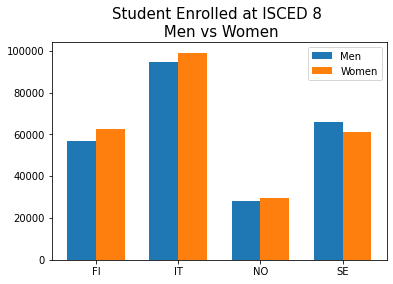

In [10]:
# Histogram for the enrolled student: comparisong between men and women 
labels = ['FI', 'IT', 'NO', 'SE']
men_means = list(tot_stud_enrolled_men)
women_means = list(tot_stud_enrolled_wom)

x = np.arange(len(labels)) 
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

ax.set_title('Student Enrolled at ISCED 8 \n Men vs Women', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

In [11]:
tot_stud_graduated_men = data_clean0.groupby(['Country Code'])['Graduates at ISCED 8 - men'].sum()
tot_stud_graduated_wom = data_clean0.groupby(['Country Code'])['Graduates at ISCED 8 - women'].sum()
tot_stud_enrolled_wom

Country Code
FI    62533.0
IT    99123.0
NO    29701.0
SE    61152.0
Name: Students enrolled at ISCED 8 - women, dtype: float64

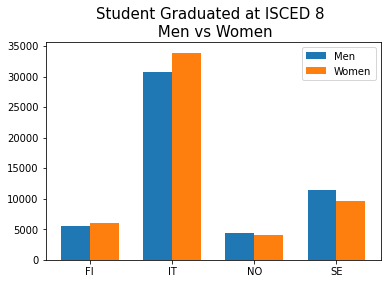

In [12]:
# Histogram for the graduated student: comparisong between men and women 
labels = ['FI', 'IT', 'NO', 'SE']
men_means = list(tot_stud_graduated_men)
women_means = list(tot_stud_graduated_wom)

x = np.arange(len(labels)) 
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

ax.set_title('Student Graduated at ISCED 8 \n Men vs Women', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

In [13]:
tot_enrolled = data_clean0.groupby(['Country Code'])['Total students enrolled at ISCED 8'].sum()
tot_graduated = data_clean0.groupby(['Country Code'])['Total graduates at ISCED 8'].sum()
tot_enrolled

Country Code
FI    119337.0
IT    193768.0
NO     57751.0
SE    126907.0
Name: Total students enrolled at ISCED 8, dtype: float64

In [14]:
tot_graduated

Country Code
FI    11629.0
IT    64760.0
NO     8556.0
SE    21011.0
Name: Total graduates at ISCED 8, dtype: float64

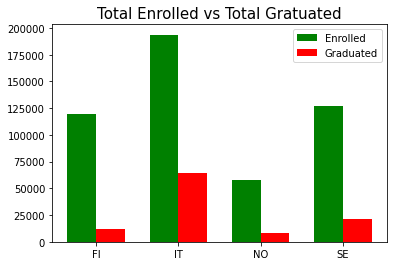

In [15]:
# Histogram for analyze the difference between the total enrolled and the total graduated 
labels = ['FI', 'IT', 'NO', 'SE']
men_means = list(tot_enrolled)
women_means = list(tot_graduated)

x = np.arange(len(labels)) 
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Enrolled', color='g')
rects2 = ax.bar(x + width/2, women_means, width, label='Graduated', color="r")

ax.set_title('Total Enrolled vs Total Gratuated', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

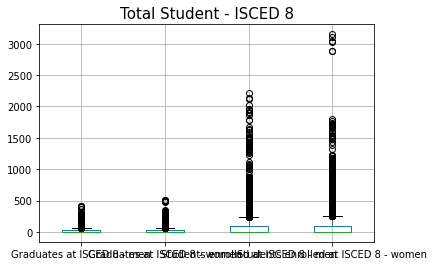

In [16]:
labels = ['Grad-m', 'Grad-w', 'Enr-m', 'Enr-w']
boxplot = data_clean0.boxplot(column=['Graduates at ISCED 8 - men','Graduates at ISCED 8 - women',
                               'Students enrolled at ISCED 8 - men', 
                               'Students enrolled at ISCED 8 - women'])
plt.title('Total Student - ISCED 8',fontsize=15)
boxplot
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.legend()
plt.show()

In [0]:
# Dendogram
from scipy.cluster import hierarchy
import sys
sys.setrecursionlimit(10000)
hcl_67=data_clean0.groupby(['Country Code'])[['Students enrolled at ISCED 8 - men','Students enrolled at ISCED 8 - women']]

# Calculate the distance between each sample
Z = hierarchy.linkage(hcl_67, 'ward')

plt.figure(figsize=(25,10))
# Plot with Custom leaves
hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=hcl_67.index)
plt.show()

Accuracy

In [0]:
values_unknown = ['m','a','xr','s','xc','x','c','nc']
country_code = ['FI', 'IT', 'NO', 'SE']

# Variable regarding gender gap ai ISCED 8
variables = ['ETER ID Year', 'ETER ID', 'National identifier', 'Institution Name',
       'Country Code', 'Region of establishment (NUTS 2)',
       'Research active institution',
       'Students enrolled at ISCED 8 - men',
       'Students enrolled at ISCED 8 - women',
       'Students enrolled ISCED 8 - gender unclassified',
       'Total students enrolled at ISCED 8', 'Graduates at ISCED 8 - men',
       'Graduates at ISCED 8 - women', 'Total graduates at ISCED 8', 'PhD intensity']
raw_data = data[variables]

In [0]:
# Accuracy 
before_accuracy=defaultdict()
for j in raw_data.columns:
    counter=0
    for i in range(len(list((raw_data[j])))):
        if str(list(raw_data[j])[i]).isdigit():
            if int(list(raw_data[j])[i])>=0:
                counter+=1
        else:
            if list(raw_data[j])[i] in (values_unknown):
                counter+=1
            elif list(raw_data[j])[i] in (country_code):
                counter+=1
    before_accuracy[j]=counter/len(data)

In [0]:
# Create the table with the results
pd.DataFrame.from_dict(before_accuracy, orient='index').loc[variables,:]

,0
ETER ID Year,0.000000
ETER ID,0.000000
National identifier,0.751934
Institution Name,0.000000
Country Code,1.000000
Region of establishment (NUTS 2),0.000000
Research active institution,1.000000
Students enrolled at ISCED 8 - men,1.000000
Students enrolled at ISCED 8 - women,1.000000
Students enrolled ISCED 8 - gender unclassified,1.000000
